<a href="https://colab.research.google.com/github/dmaresza/PyTorch-Course/blob/main/03_PyTorch_Computer_Vision_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Wed May 15 15:47:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.1+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self-driving cars
2. Facial recognition
3. Medical imaging

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning happens when a model makes great predictions on training data but then is unable to make accurate predictions for test data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. **Early stopping** - If you train your model for a shorter amount of time, you give the model less time to learn the noise in the data. (If you stop TOO early though, you can end up with an underfitted model)
2. **Data augmentation** - Changing the input data slightly (e.g. rotating or flipping an input image) can make a training set appear unique to the model and prevents the model from learning its characteristics.
3. **Removing neurons/layers** - Reducing the number of layers or number of neurons per layer in a model can reduce the complexity of a model, which can reduce the likelyhood of overfitting.


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

len(train_data), len(test_data)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17097455.37it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 526137.07it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4540313.24it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10192899.29it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

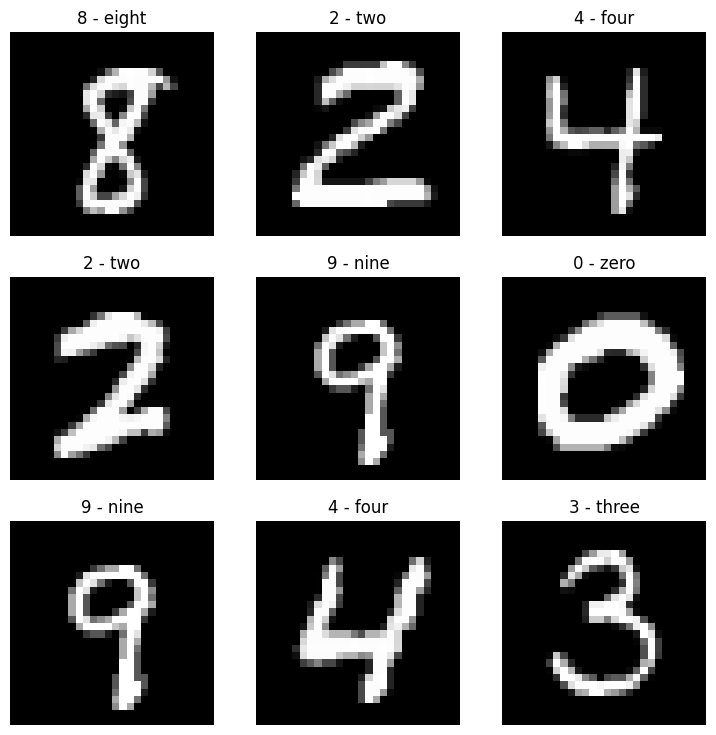

In [5]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_index]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(train_data.classes[label])
  plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Lenght of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader: 1875 batches of 32
Lenght of test_dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [18]:
class MNISTModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    #'''
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x
    #'''
    #return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [19]:
#torch.manual_seed(42)
model = MNISTModel(input_shape=1,
                   hidden_units=10,
                   output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [9]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [20]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn
from timeit import default_timer as timer

#torch.manual_seed(42)
#torch.cuda.manual_seed(42)

train_time_start_on_device = timer()

epochs = 5

# Training
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(train_dataloader):
    model.train()
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    '''
    if batch % 300 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    '''

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")

  # Testing
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%\n")

train_time_end_on_device = timer()
print(f"Train time on {device}: {train_time_end_on_device - train_time_start_on_device:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.5145 | Train acc: 81.90%
Test loss: 0.0954 | Test acc: 97.05%

Epoch: 1
--------
Train loss: 0.0781 | Train acc: 97.57%
Test loss: 0.0583 | Test acc: 98.01%

Epoch: 2
--------
Train loss: 0.0577 | Train acc: 98.19%
Test loss: 0.0548 | Test acc: 98.10%

Epoch: 3
--------
Train loss: 0.0491 | Train acc: 98.42%
Test loss: 0.0451 | Test acc: 98.57%

Epoch: 4
--------
Train loss: 0.0438 | Train acc: 98.61%
Test loss: 0.0363 | Test acc: 98.77%

Train time on cuda: 60.709 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [23]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

pred_probs = []
model.to(device)
model.eval()
with torch.inference_mode():
  for sample in test_samples:
    sample = torch.unsqueeze(sample, dim=0).to(device)
    pred_logit = model(sample)
    pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
    pred_probs.append(pred_prob.cpu())

pred_classes = torch.stack(pred_probs).argmax(dim=1)

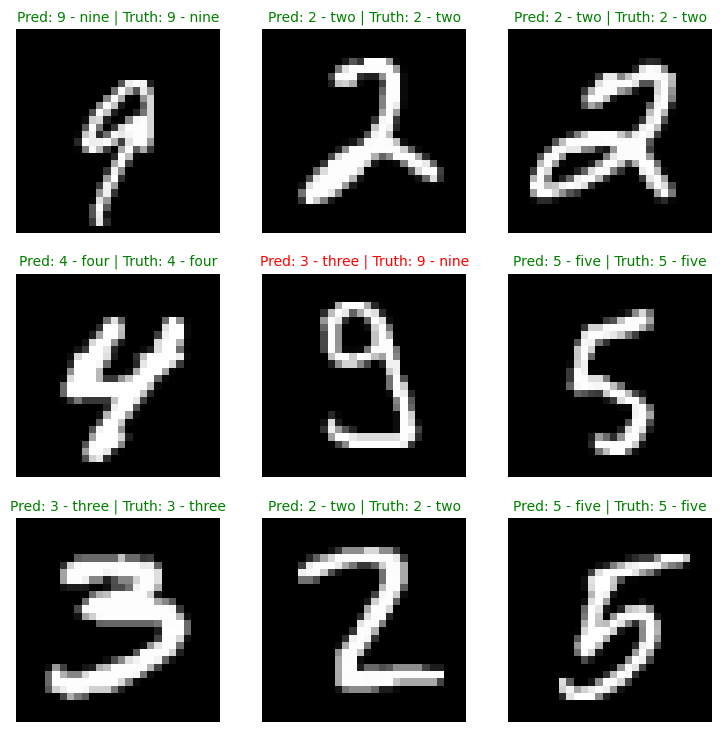

In [24]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = train_data.classes[pred_classes[i]]
  truth_label = train_data.classes[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [13]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.5 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [25]:
y_preds = []
model.to(device)
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    y_logit = model(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

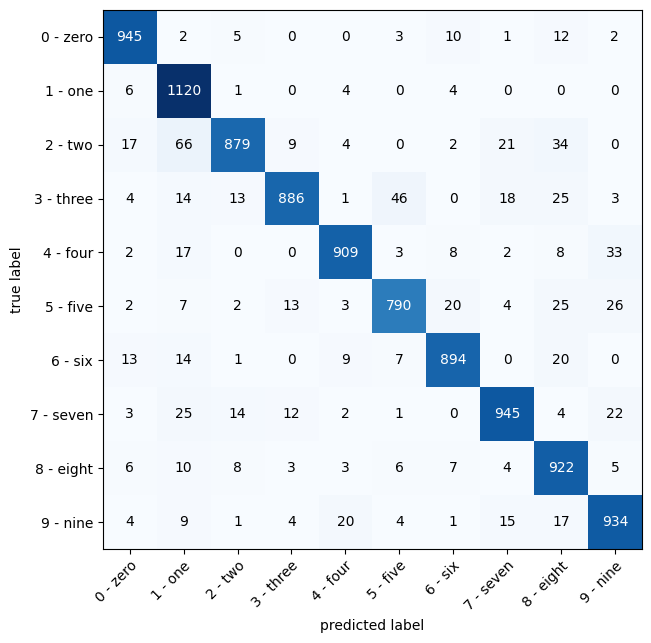

In [26]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(test_data.classes))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=test_data.classes,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [16]:
random_tensor = torch.randn(size=(1, 3, 64, 64))
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=1,
                       stride=1,
                       padding=1)

conv_output = conv_layer(random_tensor)
conv_output.shape

torch.Size([1, 10, 66, 66])

If the `kernel_size` parameter goes up, the shape of the output tensor changes so that the last two dimensions decrease.
For example, when `kernel_size=10` and `padding=0`: Input tensor shape = [1, 3, 64, 64] -> Output tensor shape = [1, out_channels, 55, 55]
Conversely, if the `kernel_size` parameter goes down (but it must be > 0), the shape of the output tensor changes so that the last two dimensions increase.
When `kernel_size=1` and `padding=1`: Input tensor shape: [1, 3, 64, 64] -> Output tensor shape = [1, out_channels, 66, 66]

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [17]:
fashion_train_data = datasets.FashionMNIST(root="data",
                                           download=True,
                                           train=True,
                                           transform=ToTensor(),
                                           target_transform=None)

fashion_test_data = datasets.FashionMNIST(root="data",
                                          download=True,
                                          train=False,
                                          transform=ToTensor(),
                                          target_transform=None)

len(fashion_train_data), len(fashion_test_data)

100%|██████████| 26421880/26421880 [00:02<00:00, 11192112.27it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207242.89it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3755158.45it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22260079.37it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(60000, 10000)

In [30]:
fashion_train_dataloader = DataLoader(dataset=fashion_train_data,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True)

fashion_test_dataloader = DataLoader(dataset=fashion_test_data,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False)

len(fashion_train_dataloader), len(fashion_test_dataloader)

(1875, 313)

In [39]:
fashion_model = MNISTModel(input_shape=1,
                           hidden_units=10,
                           output_shape=len(fashion_train_data.classes)).to(device)

optimizer = torch.optim.SGD(params=fashion_model.parameters(),
                            lr=0.1)

In [40]:
fashion_train_time_start_on_device = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(fashion_train_dataloader):
    fashion_model.train()
    X, y = X.to(device), y.to(device)
    y_pred = fashion_model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(fashion_train_dataloader)
  train_acc /= len(fashion_train_dataloader)

  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")

  # Testing
  test_loss, test_acc = 0, 0
  fashion_model.eval()
  with torch.inference_mode():
    for X_test, y_test in fashion_test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = fashion_model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(fashion_test_dataloader)
    test_acc /= len(fashion_test_dataloader)

  print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%\n")

fashion_train_time_end_on_device = timer()
print(f"Train time on {device}: {fashion_train_time_end_on_device - fashion_train_time_start_on_device:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.5844 | Train acc: 78.93%
Test loss: 0.3906 | Test acc: 85.77%

Epoch: 1
--------
Train loss: 0.3486 | Train acc: 87.34%
Test loss: 0.3717 | Test acc: 86.40%

Epoch: 2
--------
Train loss: 0.3121 | Train acc: 88.64%
Test loss: 0.3182 | Test acc: 88.29%

Epoch: 3
--------
Train loss: 0.2895 | Train acc: 89.56%
Test loss: 0.3200 | Test acc: 88.73%

Epoch: 4
--------
Train loss: 0.2759 | Train acc: 89.95%
Test loss: 0.3343 | Test acc: 87.72%

Train time on cuda: 61.625 seconds


In [41]:
test_preds = []
fashion_model.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_test_dataloader, desc="Making predictions..."):
    X_test, y_test = X_test.to(device), y_test.to(device)
    y_logit = fashion_model(X_test)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    test_preds.append(y_pred.cpu())

test_preds = torch.cat(test_preds)
test_preds[:10], len(test_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 0, 1, 4, 6, 5, 7]), 10000)

In [42]:
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_test_data.targets)[0]
len(wrong_pred_indexes)

2034

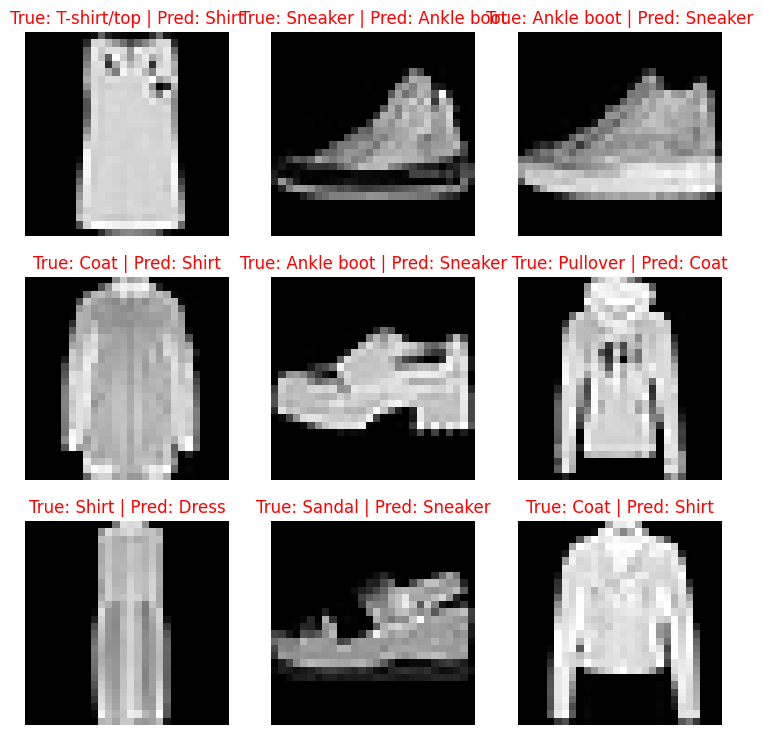

In [55]:
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(9, 9))
for i, idx in enumerate(random_selection):
  true_label = fashion_train_data.classes[fashion_test_data[idx][1]]
  pred_label = fashion_train_data.classes[test_preds[idx]]

  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_test_data[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);

I think the labels of the data can be a bit difficult to categorize. What's the difference between a shirt and a T-shirt/top? What's the difference between a coat and a pullover? It doesn't surprise me that the model gets confused with several of these predictions, since the clothing garments can tend to look quite similar. I think if the images were of a higher resolution, a model might be able to notice more differences and therefore make more accurate predictions.